In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 23R Capital Plan

In [2]:
capital_plan = pd.read_excel('Project Data/23R Capital Plan 4.13.22.xlsx')
len(capital_plan.index)

400

In [3]:
# remove the projects that are not in district 7
capital_plan = capital_plan.loc[capital_plan['Council_District'] == 'District 7']
len(capital_plan.index)

32

In [4]:
capital_plan.head()

,Department,Project_Name,Scope_Of_Work,PM_Department,Project_Status,Neighborhood,Neighborhood_alt,Council_District,Authorization_Existing,Authorization_FY,...,GO_Expended,Capital_Year_0,CapitalYear_1,Capital_Year_25,Grant_Expended,Grant_Year_0,Grant_Year_1,GrantYear_25,External_Funds,Total_Project_Budget
25,Office of Arts & Culture,The Legacy of Frederick Douglass,Fabricate and install a bronze figure grouping...,Office of Arts and Culture,To Be Scheduled,Roxbury,Roxbury,District 7,550000,0,...,0,0,50000,500000,0,0,0,0,0,550000
41,Parks and Recreation Department,Bynoe Park,Upgrades to play equipment.,Parks and Recreation Department,In Design,Roxbury,Roxbury,District 7,1120000,0,...,0,60000,800000,260000,0,0,0,0,0,1120000
62,Parks and Recreation Department,Crawford Street Playground,Design for a comprehensive park improvement in...,Parks and Recreation Department,In Design,Roxbury,Roxbury,District 7,1800000,0,...,0,100000,250000,1450000,0,0,0,0,0,1800000
82,Parks and Recreation Department,Dudley Town Common,Improvements to Dudley Town Common to support ...,Parks and Recreation Department,In Design,Roxbury,Roxbury,District 7,972000,0,...,0,0,50000,1220000,0,0,0,0,0,1270000
89,Transportation Department,Nubian Square Improvements,Roadway improvements from Shawmut Avenue to Ha...,Transportation Department,In Construction,Roxbury,Roxbury,District 7,922183,0,...,792217,29966,100000,0,4000421,1977396,5000000,6000000,0,17900000


In [5]:
capital_plan['Neighborhood'].unique()

array(['Roxbury', 'South End', 'Fenway/Kenmore', 'Dorchester'],
      dtype=object)

Text(0, 0.5, 'Budget (in 10 millions)')

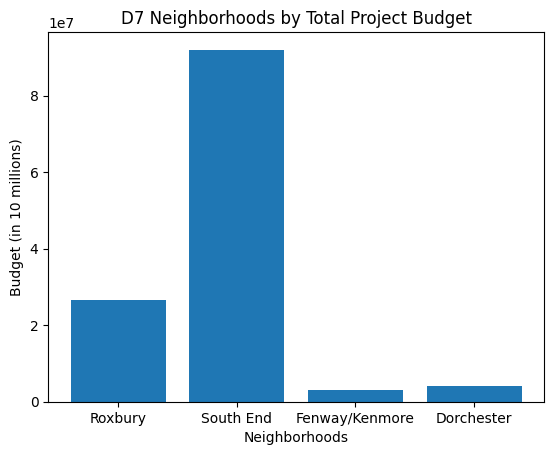

In [6]:
neighborhoods = capital_plan['Neighborhood']
total_budget = capital_plan['Total_Project_Budget']

plt.bar(neighborhoods, total_budget)
plt.title('D7 Neighborhoods by Total Project Budget')
plt.xlabel('Neighborhoods')
plt.ylabel('Budget (in 10 millions)')

The data explored in this visualization is Neighborhoods (categorical) and Budget (quantitative average). We represented this trend with a bar chart that incorporates line marks and manipulates both horizontal and vertical positional channels. This visual encoding is most useful for displaying binned information because it can effectively show the counts of each category relative to the other categories.

From this visualization one can easily conclude that the South End neighborhood receives the highest average total budget across all its projects and departments with a little less than $100,000,000. Followed by Roxbury who receives approximately $30,000,000. Fenway/Kenmore and Dorchester neighboords receive the least. It is not surprising to see that South End receives the most money because it is a neighborhood consisting mainly of upper-middle class, but it is surprising to see that Roxbury gets the second most. The Councilor wants us to show the disparity in the bugdet allocation between neighborhoods, which is obvious from the graph. One can justify equal distribution of funds across the neighborhoods but it might be harder to justify why Roxbury should continue to receive more funding when it already has been compared to Fenway/Kenmore and Dorchester.

For future work, we can incorporate other statistics about Roxbury (police presence) that can explain why the neighborhood needs still more funding than others due to various circumstances.

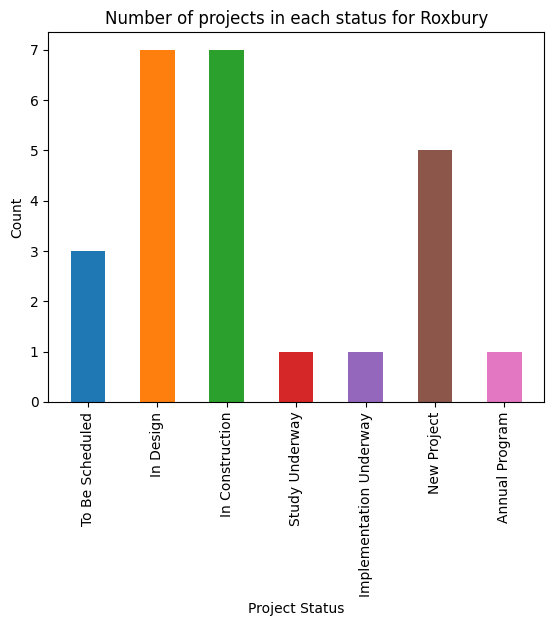

In [7]:
num_status = np.arange(1)
width1 = 0.5

ax = plt.subplot()

 
# Create the To Be Scheduled subplot
schedule_count = capital_plan.loc[(
    capital_plan['Neighborhood'] == 'Roxbury') &
    (capital_plan['Project_Status'] == 'To Be Scheduled')
    ]
schedule_count = len(schedule_count.index)
ax.bar('To Be Scheduled', schedule_count, width=width1, label='To Be Scheduled')

# Create the In Design subplot
design_count = capital_plan.loc[(
    capital_plan['Neighborhood'] == 'Roxbury') &
    (capital_plan['Project_Status'] == 'In Design')
    ]
design_count = len(design_count.index)
ax.bar('In Design', design_count, width=width1, label='In Design')

# Create the In Construction subplot
construct_count = capital_plan.loc[(
    capital_plan['Neighborhood'] == 'Roxbury') &
    (capital_plan['Project_Status'] == 'In Construction')
    ]
construct_count = len(construct_count.index)
ax.bar('In Construction', construct_count, width=width1, label='In Construction')

# Create the Study Underway subplot
study_count = capital_plan.loc[(
    capital_plan['Neighborhood'] == 'Roxbury') &
    (capital_plan['Project_Status'] == 'Study Underway')
    ]
study_count = len(study_count.index)
ax.bar('Study Underway', study_count, width=width1, label='Study Underway')

# Create the Implementation Underwat subplot
imp_count = capital_plan.loc[(
    capital_plan['Neighborhood'] == 'Roxbury') &
    (capital_plan['Project_Status'] == 'Implementation Underway')
    ]
imp_count = len(imp_count.index)
ax.bar('Implementation Underway', imp_count, width=width1, label='Implementation Underway')

# Create the New Project subplot
new_count = capital_plan.loc[(
    capital_plan['Neighborhood'] == 'Roxbury') &
    (capital_plan['Project_Status'] == 'New Project')
    ]
new_count = len(new_count.index)
ax.bar('New Project', new_count, width=width1, label='New Project')

# Create the Annual Program subplot
annual_count = capital_plan.loc[(
    capital_plan['Neighborhood'] == 'Roxbury') &
    (capital_plan['Project_Status'] == 'Annual Program')
    ]
annual_count = len(annual_count.index)
ax.bar('Annual Program', annual_count, width=width1, label='Annual Program')

plt.xticks(rotation=90)
plt.title('Number of projects in each status for Roxbury')
plt.xlabel('Project Status')
plt.ylabel('Count')
plt.show()

The data explored in this graph is Project Status (ordinal) and count (quantitative) for only projects in Roxbury. We represented this trend with a bar chart that incorporates line marks and manipulates both horizontal and vertical positional channels, as well as color. This visual encoding is most useful for displaying binned information because it can effectively show the counts of each category relative to the other categories.

From this visualization, one can deduce that majorty of Roxbury projects are In Design, In Construction, or New Project. Seven projects are under construction but the data does not give any indication about the percent of progress, for all we know these projects can still be under one week of construction and are now delayed. That leaves another 7 (In Design) + 7 (New Project) + 3 (To Be Scheudled) = 17 projects that may be receiving money but are not being implemented into the community.

For future comparisons, it would be helpful to see what the distribution of Project Status is for other neighborhoods in District 7 and examine if there is a difference in the number of projects actually in construction.

# FY23 Budget Comparison

In [8]:
budget = pd.read_excel('Project Data/FY23 Budget Comparison.xlsx')
budget.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 60,Unnamed: 61,Structures & Improvements,Unnamed: 63,Unnamed: 64,Unnamed: 65,Land Non-Structural Improvement,Unnamed: 67,Unnamed: 68,Unnamed: 69
0,Things to Note,NaN,NaN,NaN,TOTAL FY23 Resubmission (June ____),FY23 Resubmission $ Difference from INITIAL (A...,FY23 Resubmission % Difference from INITIAL (A...,FY23 Resub $ Difference from FY22 Approved,FY23 Resub % Difference from FY22 Approved,FY23 Resub $ Difference from FY21 Approved,...,FY22 - FY23 $ Difference,FY22 - FY23 % Change,Stuctures & Improvements FY21,Structures & Improvements FY22,FY21 - FY22 $ Difference,FY21 - FY22 % Change,Land Non-Structural Improvement FY21,Land Non-Structural improvement FY22,FY21 - FY22 $ Difference,FY21 - FY22 % Change
1,NaN,NaN,NaN,Mayor's Office,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,111,Mayor's Office,NaN,-6001165,-1,-5380619,NaN,-1.105061,...,0,NaN,0,0,0,NaN,0,0,0,NaN
3,NaN,NaN,"121, 128",Election Department,NaN,-6814489,-1,-5262101,NaN,-1.073148,...,0,NaN,0,0,0,NaN,0,0,0,NaN
4,NaN,NaN,150,Intergovernmental Relations,NaN,-1533285,-1,-1388348,NaN,-1.083715,...,0,NaN,0,0,0,NaN,0,0,0,NaN


Horribly organized Excel file; it is not easily imported by pandas because of the many missing row values and nested columns. Data doesn't provide information for Roxbury specific operations as compared to the rest of District 7 and column titles give no indication of what it is representing.

# Crime Incident Report 2022

In [19]:
crime = pd.read_csv('Project Data/2022.csv')
len(crime.index)

/var/folders/71/723ncf_d5zl3dj94vpv18m780000gn/T/ipykernel_94894/791245390.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  crime = pd.read_csv('Project Data/2022.csv')


73852

In [23]:
crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,222076257,619,NaN,LARCENY ALL OTHERS,D4,167,0,2022-01-01 00:00:00,2022,1,Saturday,0,NaN,HARRISON AVE,42.339542,-71.069409,"(42.33954198983014, -71.06940876967543)"
1,222053099,2670,NaN,HARASSMENT/ CRIMINAL HARASSMENT,A7,,0,2022-01-01 00:00:00,2022,1,Saturday,0,NaN,BENNINGTON ST,42.377246,-71.032597,"(42.37724638479816, -71.0325970804128)"
2,222039411,3201,NaN,PROPERTY - LOST/ MISSING,D14,778,0,2022-01-01 00:00:00,2022,1,Saturday,0,NaN,WASHINGTON ST,42.349056,-71.150498,"(42.34905600030506, -71.15049849975023)"
3,222011090,3201,NaN,PROPERTY - LOST/ MISSING,B3,465,0,2022-01-01 00:00:00,2022,1,Saturday,0,NaN,BLUE HILL AVE,42.284826,-71.091374,"(42.28482576580488, -71.09137368938802)"
4,222062685,3201,NaN,PROPERTY - LOST/ MISSING,B3,465,0,2022-01-01 00:00:00,2022,1,Saturday,0,NaN,BLUE HILL AVE,42.284826,-71.091374,"(42.28482576580488, -71.09137368938802)"


In [22]:
crime['DISTRICT'].unique()

array(['D4', 'A7', 'D14', 'B3', 'A1', 'C6', 'A15', 'E5', 'E18', 'B2',
       'C11', 'E13', nan, 'External'], dtype=object)